In [ ]:
library(tidyverse)   
library(readr)       
library(readxl)     
library(vegan)       
library(reshape2)  
library(dplyr)
library(randomForest)

In [ ]:
spe <- read.delim ('https://raw.githubusercontent.com/zdealveindy/anadat-r/master/data/MQU_spe.txt', row.names = 1)
env <- read.delim ('https://raw.githubusercontent.com/zdealveindy/anadat-r/master/data/MQU_env.txt', row.names = 1)
traits <- read.delim ('https://raw.githubusercontent.com/zdealveindy/anadat-r/master/data/MQU_traits.txt', row.names = 1)
loc <- read.delim ('https://raw.githubusercontent.com/zdealveindy/anadat-r/master/data/MQU_loc.txt')

In [7]:
library(vegan)
library('BAT')

CWM <- functcomp(mqu_traits, mqu_spe, CWM = TRUE)
cwm(mqu_spe, mqu_traits, abund = TRUE, na.rm = FALSE)


ERROR: Error in functcomp(mqu_traits, mqu_spe, CWM = TRUE): could not find function "functcomp"


,SLA,LDMC,LT,LA,SSD
M01,14.370581,393.7528,0.2772725,4078.114,0.5418465
M02,13.580944,407.7302,0.2884859,2526.575,0.5489601
M03,18.152557,349.1867,0.2569421,4067.161,0.5113812
Q01,10.361829,451.0376,0.3241326,1834.491,0.6443798
Q02,10.453426,451.7779,0.3584489,1776.813,0.5762022
Q03,10.377224,445.8108,0.3467611,2392.542,0.5975843
U01,10.252648,456.4453,0.3495540,1625.767,0.6187009
U02,8.425461,459.7645,0.4075951,1948.134,0.6275601
U03,10.065859,444.8776,0.4973248,1147.941,0.5199114


In [9]:
library(dplyr)

Warning message:
"package 'dplyr' was built under R version 4.4.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [11]:
distance_mat <- dist(mqu_traits, method = 'euclidean')
distance_mat

                                          Acer palmatum var. pubescens
Acer serrulatum                                              749.25423
Ardisia quinquegona                                          357.18502
Barthea barthei                                              307.83592
Blastus cochinchinensis                                     1849.91442
Camellia brevistyla                                          989.23118
Camellia tenuifolia                                          931.10204
Castanopsis cuspidata var. carlesii                           57.04004
Chamaecyparis obtusa var. formosana                         1029.67804
Cinnamomum kanehirae                                        2723.26666
Cinnamomum subavenium                                        710.84785
Cleyera japonica var. longicarpa                             310.60622
Cleyera japonica var. taipinensis                            107.79367
Cryptocarya chinensis                                        682.19820
Cyclob

In [12]:
set.seed(240)
Hierar_cl <- hclust(distance_mat, method = "average")
Hierar_cl


Call:
hclust(d = distance_mat, method = "average")

Cluster method   : average 
Distance         : euclidean 
Number of objects: 89 


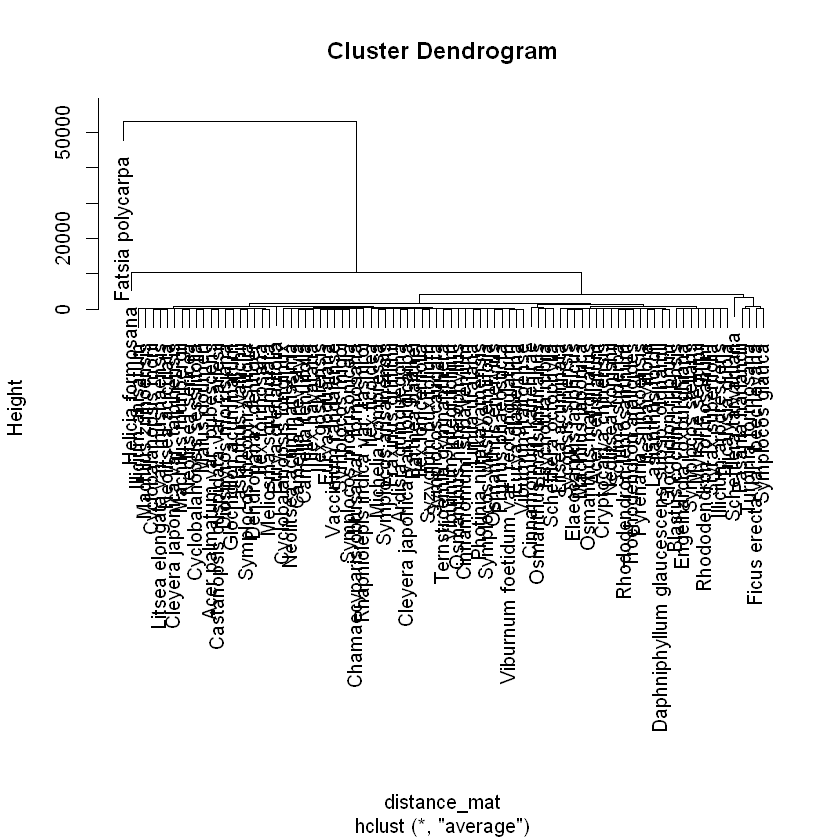

In [13]:
plot(Hierar_cl)

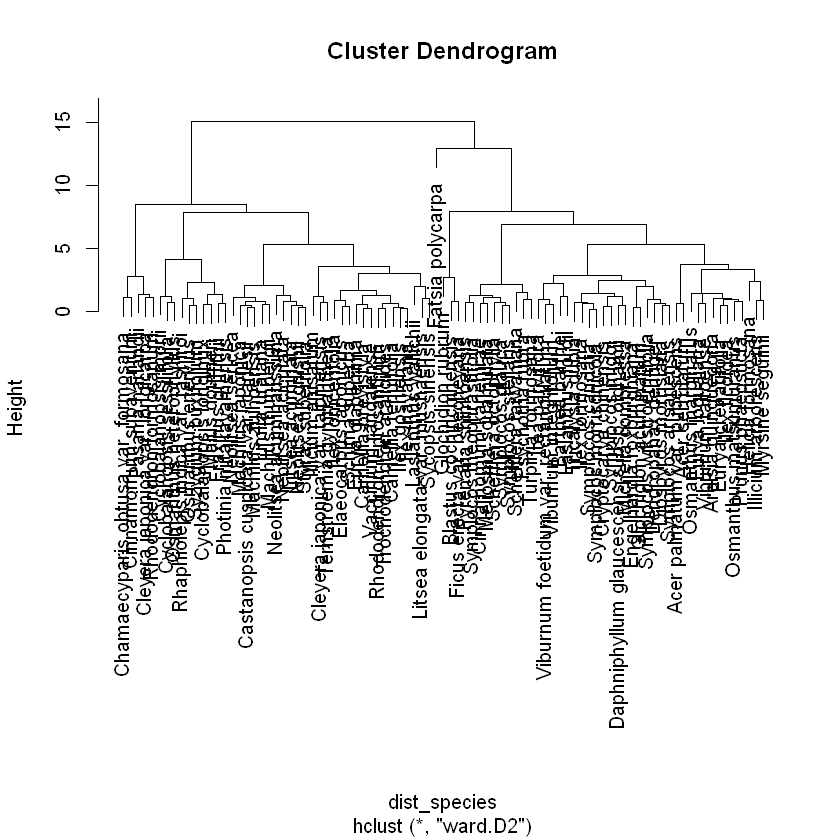

In [14]:
traits <- mqu_traits   # species × traits
traits_scaled <- scale(traits)
dist_species <- dist(traits_scaled, method = "euclidean")
hc_species <- hclust(dist_species, method = "ward.D2")
plot(hc_species)


In [15]:
clusters <- cutree(hc_species, k = 7)
clusters


Acer palmatum var. pubescens 
                                        1 
                          Acer serrulatum 
                                        1 
                      Ardisia quinquegona 
                                        1 
                          Barthea barthei 
                                        1 
                  Blastus cochinchinensis 
                                        2 
                      Camellia brevistyla 
                                        3 
                      Camellia tenuifolia 
                                        3 
      Castanopsis cuspidata var. carlesii 
                                        3 
      Chamaecyparis obtusa var. formosana 
                                        4 
                     Cinnamomum kanehirae 
                                        5 
                    Cinnamomum subavenium 
                                        4 
         Cleyera japonica var. longicarpa 
                                        4 
        Cleyera japonica var. taipinensis 
                                        3 
                    Cryptocarya chinensis 
                                        1 
                 Cyclobalanopsis longinux 
                                        6 
                    Cyclobalanopsis morii 
                                        6 
             Cyclobalanopsis sessilifolia 
                                        6 
Daphniphyllum glaucescens subsp. oldhamii 
                                        1 
                     Dendropanax dentiger 
                                        1 
                     Diospyros morrisiana 
                                        1 
                    Elaeocarpus japonicus 
                                        3 
                 Engelhardia roxburghiana 
                                        1 
                       Eurya crenatifolia 
                                        1 
                         Eurya glaberrima 
                                        3 
                          Eurya loquaiana 
                                        1 
                         Fatsia polycarpa 
                                        7 
             Ficus erecta var. beecheyana 
                                        2 
                      Fraxinus griffithii 
                                        6 
                    Glochidion acuminatum 
                                        1 
                        Glochidion rubrum 
                                        2 
                        Helicia formosana 
                                        1 
                            Ilex ficoidea 
                                        1 
                           Ilex formosana 
                                        1 
                          Ilex goshiensis 
                                        3 
                            Ilex hayatana 
                                        3 
                       Ilex lonicerifolia 
                                        3 
                        Illicium anisatum 
                                        3 
                     Illicium arborescens 
                                        1 
                          Itea parviflora 
                                        1 
                        Lasianthus fordii 
                                        1 
                     Lasianthus wallichii 
                                        3 
                           Limlia uraiana 
                                        3 
                         Litsea acuminata 
                                        3 
          Litsea elongata var. mushaensis 
                                        3 
                        Machilus japonica 
                                        3 
                      Machilus thunbergii 
                                        3 
                      Machilus zuihoensis 
              

Clustering based on cooccurence

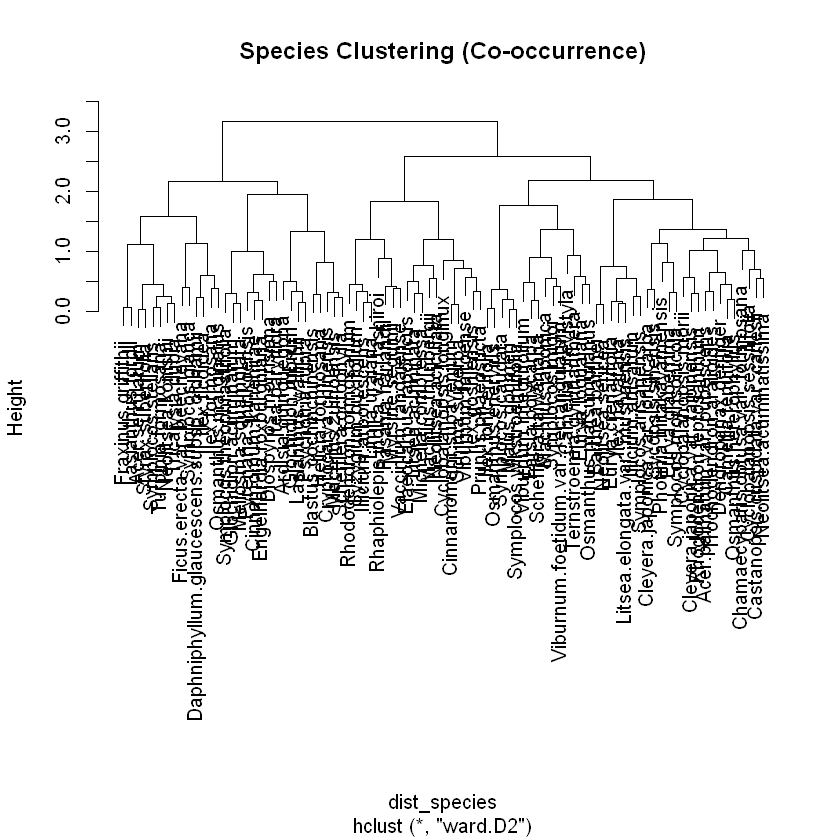

In [ ]:
library(vegan)
dist_species <- vegdist(t(mqu_spe), method = "bray")
hc_species <- hclust(dist_species, method = "ward.D2") #shepard diagram pour choisir la distance (method)
plot(hc_species, main="Species Clustering (Co-occurrence)")
